# 1)Install& Import Dependencies

In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [70]:
%matplotlib inline 
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2)Load Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\vksk0/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-26 torch 1.8.1+cu111 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3)Make Detections with Images

In [7]:
img = 'https://ultralytics.com/images/zidane.jpg'


In [8]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1808.0ms pre-process, 334.9ms inference, 46.9ms NMS per image at shape (1, 3, 384, 640)


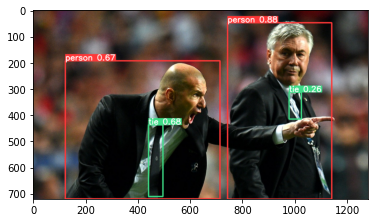

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [55, 19, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [73, 49, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 49],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

# 4)Real Time Detections

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5)Train From Scratch

In [12]:
import uuid   # Unique identifier
import os
import time

In [13]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [49]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(5)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()


In [14]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.3210d314-c5ef-11ec-b2a5-507b9da5cce3.jpg


In [15]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)  

data\images\awake.35f18a7a-c5ef-11ec-be5a-507b9da5cce3.jpg
data\images\awake.35f18a7b-c5ef-11ec-9f1d-507b9da5cce3.jpg
data\images\awake.35f18a7c-c5ef-11ec-9d4f-507b9da5cce3.jpg
data\images\awake.35f18a7d-c5ef-11ec-89a0-507b9da5cce3.jpg
data\images\awake.35f18a7e-c5ef-11ec-b113-507b9da5cce3.jpg
data\images\awake.35f18a7f-c5ef-11ec-afbb-507b9da5cce3.jpg
data\images\awake.35f18a80-c5ef-11ec-b694-507b9da5cce3.jpg
data\images\awake.35f18a81-c5ef-11ec-8d1a-507b9da5cce3.jpg
data\images\awake.35f18a82-c5ef-11ec-a7a6-507b9da5cce3.jpg
data\images\awake.35f18a83-c5ef-11ec-afc8-507b9da5cce3.jpg
data\images\awake.35f18a84-c5ef-11ec-9ec6-507b9da5cce3.jpg
data\images\awake.35f18a85-c5ef-11ec-aa2b-507b9da5cce3.jpg
data\images\awake.35f18a86-c5ef-11ec-b358-507b9da5cce3.jpg
data\images\awake.35f18a87-c5ef-11ec-9e76-507b9da5cce3.jpg
data\images\awake.35f18a88-c5ef-11ec-8165-507b9da5cce3.jpg
data\images\awake.35f18a89-c5ef-11ec-a073-507b9da5cce3.jpg
data\images\awake.35f18a8a-c5ef-11ec-9eaf-507b9da5cce3.j

In [16]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [17]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [54]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 0

^C


# 6)Load Model

In [18]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=r'C:\Users\vksk0\yolov5\runs\train\exp17\weights\last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\vksk0/.cache\torch\hub\master.zip
YOLOv5  2022-4-27 torch 1.8.1+cu111 CPU

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [19]:
img = os.path.join('data', 'images', 'awake.c37dfea8-c550-11ec-82c0-507b9da5cce3.jpg')

In [20]:
results = model(img)

In [21]:
results.print()

image 1/1: 480x640 1 awake
Speed: 40.0ms pre-process, 605.3ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


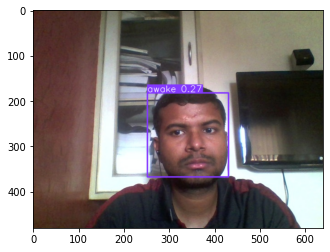

In [22]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [23]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [80]:
import pandas as pd
results =pd.read_csv(r'C:\Users\vksk0\yolov5\runs\train\exp17\results.csv')

In [81]:
results

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,...,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.109800,0.013105,0.074874,0.022453,...,0.010542,0.049882,0.000000,0.000000,0.100000
1,1,0.111830,0.013701,0.075085,0.027551,...,0.010613,0.049844,0.000100,0.000100,0.099100
2,2,0.110980,0.017835,0.073599,0.028585,...,0.010664,0.049802,0.000199,0.000199,0.098199
3,3,0.110100,0.017241,0.074367,0.028335,...,0.010722,0.049735,0.000298,0.000298,0.097298
4,4,0.108490,0.018644,0.074082,0.020714,...,0.010794,0.049661,0.000397,0.000397,0.096397
...,...,...,...,...,...,...,...,...,...,...,...
306,306,0.032880,0.008955,0.012884,0.872950,...,0.005696,0.004400,0.003961,0.003961,0.003961
307,307,0.028659,0.010295,0.008938,0.989600,...,0.005761,0.004315,0.003941,0.003941,0.003941
308,308,0.035514,0.006536,0.008764,0.989600,...,0.005761,0.004315,0.003921,0.003921,0.003921
309,309,0.034686,0.012239,0.015554,0.989600,...,0.005761,0.004315,0.003902,0.003902,0.003902


In [82]:
results.columns

Index(['               epoch', '      train/box_loss', '      train/obj_loss',
       '      train/cls_loss', '   metrics/precision', '      metrics/recall',
       '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss',
       '        val/obj_loss', '        val/cls_loss', '               x/lr0',
       '               x/lr1', '               x/lr2'],
      dtype='object')

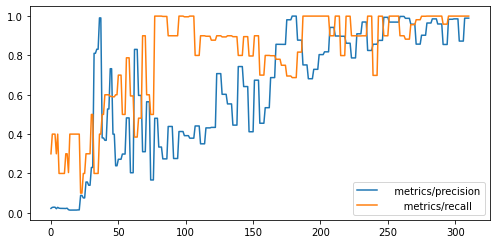

In [79]:
import pandas as pd
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Make a list of columns
columns = [ '   metrics/precision', '      metrics/recall']

# Read a CSV file
df = pd.read_csv(r'C:\Users\vksk0\yolov5\runs\train\exp17\results.csv', usecols=columns)

# Plot the lines
df.plot()

plt.show()

In [85]:
import pickle
pickle.dump(model, open('./model.sav', 'wb'))